In [66]:
import FinanceDataReader as fdr
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
from sklearn.model_selection import train_test_split


from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [1]:
path = "C:/Users/procns/Desktop/스터디/주식예측/train.csv"
#plt.rc('font', family='NanumGothic')

In [3]:
df = pd.read_csv(path)
df.set_index('일자', inplace = True)

In [4]:
df

,종목코드,종목명,거래량,시가,고가,저가,종가
일자,,,,,,,
20210601,A060310,3S,166690,2890,2970,2885,2920
20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
20210601,A054620,APS,462544,14600,14950,13800,14950
20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...
20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
20230530,A000540,흥국화재,50218,3250,3255,3195,3215
20230530,A003280,흥아해운,130664,1344,1395,1340,1370


In [5]:
values = df['종목명'].unique()
values

array(['3S', 'AJ네트웍스', 'AK홀딩스', ..., '흥아해운', '희림', '힘스'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988000 entries, 20210601 to 20230530
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   종목코드    988000 non-null  object
 1   종목명     988000 non-null  object
 2   거래량     988000 non-null  int64 
 3   시가      988000 non-null  int64 
 4   고가      988000 non-null  int64 
 5   저가      988000 non-null  int64 
 6   종가      988000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 60.3+ MB


In [9]:
#data = df[(df['종목명'] == '넥슨게임즈') & (df.index.astype(str).str.startswith('2022'))]
data = df[(df['종목명'] == '넥슨게임즈')]

In [10]:
data

,종목코드,종목명,거래량,시가,고가,저가,종가
일자,,,,,,,
20210601,A225570,넥슨게임즈,134777,10900,11000,10650,10700
20210602,A225570,넥슨게임즈,127185,10700,10750,10500,10600
20210603,A225570,넥슨게임즈,110250,10550,10900,10500,10850
20210604,A225570,넥슨게임즈,70734,10850,10950,10750,10850
20210607,A225570,넥슨게임즈,91461,10900,10950,10600,10800
...,...,...,...,...,...,...,...
20230523,A225570,넥슨게임즈,891621,20750,21050,19960,20400
20230524,A225570,넥슨게임즈,738235,20250,20300,19550,19600
20230525,A225570,넥슨게임즈,550344,19410,19820,19070,19440


C:\Users\procns\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\procns\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\procns\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\procns\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


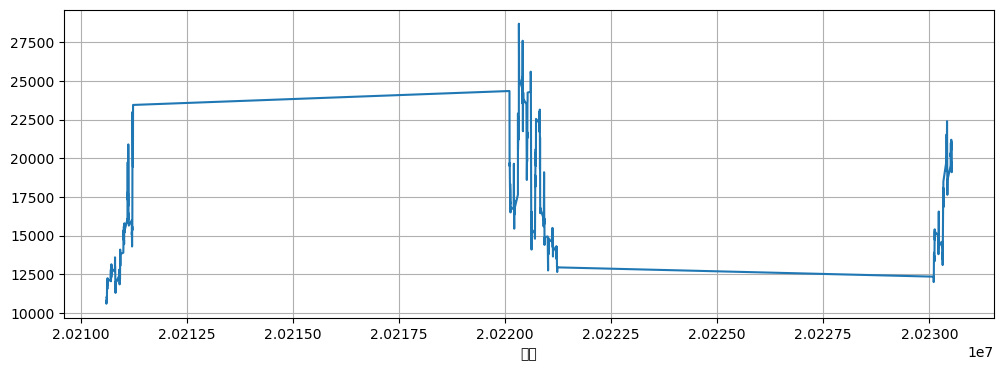

In [11]:
data['종가'].plot(figsize=(12,4), grid=True);

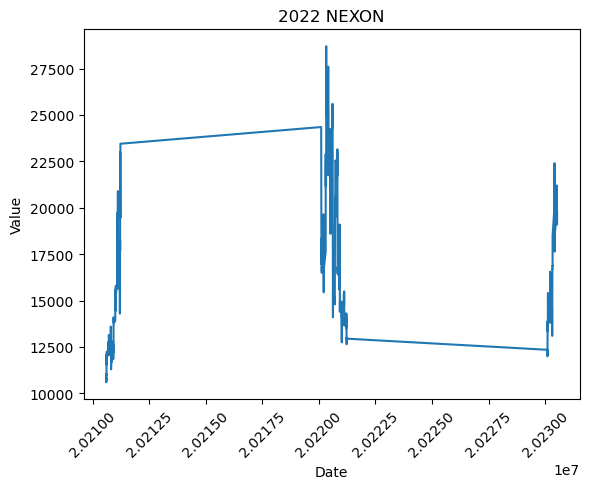

In [13]:
plt.plot(data.index, data['종가'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('2022 NEXON')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

In [15]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [53]:
dfx = data[['시가','고가','저가','거래량', '종가']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
dfx = dfx[['시가','고가','저가','거래량']]
dfx

,시가,고가,저가,거래량
일자,,,,
20210601,0.019663,0.012195,0.008902,0.005652
20210602,0.008427,0.000000,0.000000,0.005171
20210603,0.000000,0.007317,0.000000,0.004095
20210604,0.016854,0.009756,0.014837,0.001587
20210607,0.019663,0.009756,0.005935,0.002903
...,...,...,...,...
20230523,0.573034,0.502439,0.561424,0.053698
20230524,0.544944,0.465854,0.537092,0.043961
20230525,0.497753,0.442439,0.508605,0.032033


In [41]:
dfx = data[['시가','고가','저가','거래량']]
dfx = MinMaxScaler(dfx)
dfy = data[['종가']]
dfx

,시가,고가,저가,거래량
일자,,,,
20210601,0.019663,0.012195,0.008902,0.005652
20210602,0.008427,0.000000,0.000000,0.005171
20210603,0.000000,0.007317,0.000000,0.004095
20210604,0.016854,0.009756,0.014837,0.001587
20210607,0.019663,0.009756,0.005935,0.002903
...,...,...,...,...
20230523,0.573034,0.502439,0.561424,0.053698
20230524,0.544944,0.465854,0.537092,0.043961
20230525,0.497753,0.442439,0.508605,0.032033


In [54]:
dfx.describe()

,시가,고가,저가,거래량
count,494.000000,494.000000,494.000000,494.000000
mean,0.355385,0.328149,0.350123,0.076366
std,0.216384,0.199951,0.218208,0.120243
min,0.000000,0.000000,0.000000,0.000000
25%,0.186798,0.168415,0.184125,0.020711
50%,0.301966,0.288780,0.295252,0.042352
75%,0.519663,0.482317,0.525223,0.074680
max,1.000000,1.000000,1.000000,1.000000


In [55]:
dfy.head()

,종가
일자,
20210601,0.005525
20210602,0.000000
20210603,0.013812
20210604,0.013812
20210607,0.011050


In [56]:
X = np.array(dfx)
y = np.array(dfy)

In [57]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.51067416 0.50731707 0.54243323 0.10324827]
 [0.5758427  0.50487805 0.56973294 0.05883995]
 [0.59550562 0.55121951 0.60830861 0.08534776]
 [0.6011236  0.51707317 0.58753709 0.03519662]
 [0.58146067 0.50487805 0.57566766 0.03781486]
 [0.56460674 0.52439024 0.59643917 0.04800742]
 [0.57303371 0.50243902 0.56142433 0.05369824]
 [0.54494382 0.46585366 0.53709199 0.04396103]
 [0.49775281 0.44243902 0.50860534 0.03203339]
 [0.49775281 0.44       0.51038576 0.02574628]] -> [0.50441989]


In [58]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [59]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [60]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

# LSTM

In [61]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Bidirectional(LSTM(64)))
#model.add(Dropout(0.1))
#model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 20)            2000      
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              43520     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 45,649
Trainable params: 45,649
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics= 'mae')
history = model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 10s 19ms/step - loss: 0.0813 - mae: 0.2154
Epoch 2/70
12/12 [==============================] - 0s 19ms/step - loss: 0.0226 - mae: 0.1294
Epoch 3/70
12/12 [==============================] - 0s 19ms/step - loss: 0.0167 - mae: 0.1002
Epoch 4/70
12/12 [==============================] - 0s 22ms/step - loss: 0.0139 - mae: 0.0939
Epoch 5/70
12/12 [==============================] - 0s 21ms/step - loss: 0.0130 - mae: 0.0842
Epoch 6/70
12/12 [==============================] - 0s 22ms/step - loss: 0.0127 - mae: 0.0822
Epoch 7/70
12/12 [==============================] - 0s 21ms/step - loss: 0.0127 - mae: 0.0817
Epoch 8/70
12/12 [==============================] - 0s 21ms/step - loss: 0.0122 - mae: 0.0806
Epoch 9/70
12/12 [==============================] - 0s 21ms/step - loss: 0.0116 - mae: 0.0779
Epoch 10/70
12/12 [==============================] - 0s 23ms/step - loss: 0.0111 - mae: 0.0761
Epoch 11/70
12/12 [==============================] - 0s 20

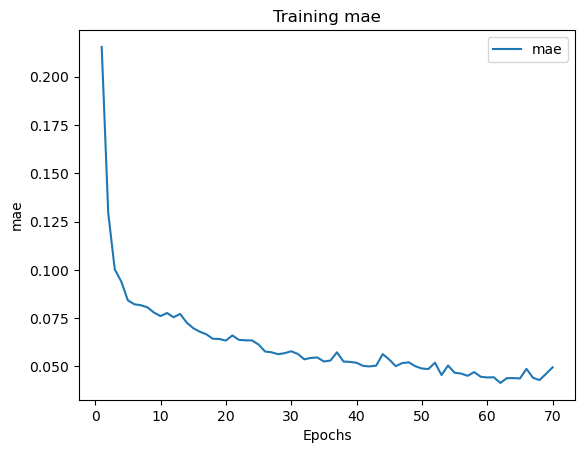

In [64]:
history_dict = history.history
mae = history_dict['mae']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['mae'] 
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, label='mae') 

plt.title('Training mae') 
plt.xlabel('Epochs')
plt.ylabel('mae') 
plt.legend()
plt.show()

5/5 [==============================] - 0s 9ms/step


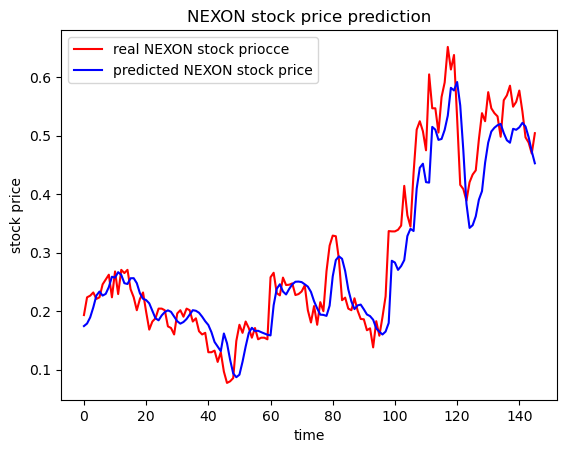

 20221230 주가 : [17715.80830419] KRW


In [63]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real NEXON stock priocce')
plt.plot(pred_y, color='blue', label='predicted NEXON stock price')
plt.title('NEXON stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print(" 20221230 주가 :", data['종가'][-1:].values * pred_y[-1] / dfy['종가'][-1:].values, 'KRW')
#df.Close[-1] : dfy.Close[-1] = y : pred_y[-1]

# CNN

In [67]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10,4)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=1))
model.summary()

 
 # fit network

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 64)             832       
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 dropout_4 (Dropout)         (None, 6, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dropout_5 (Dropout)         (None, 192)               0         
                                                      

In [68]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics= 'mae')
history = model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 2s 8ms/step - loss: 0.0823 - mae: 0.1985
Epoch 2/70
12/12 [==============================] - 0s 7ms/step - loss: 0.0256 - mae: 0.1125
Epoch 3/70
12/12 [==============================] - 0s 7ms/step - loss: 0.0215 - mae: 0.1060
Epoch 4/70
12/12 [==============================] - 0s 7ms/step - loss: 0.0186 - mae: 0.0972
Epoch 5/70
12/12 [==============================] - 0s 7ms/step - loss: 0.0161 - mae: 0.0892
Epoch 6/70
12/12 [==============================] - 0s 7ms/step - loss: 0.0146 - mae: 0.0887
Epoch 7/70
12/12 [==============================] - 0s 8ms/step - loss: 0.0134 - mae: 0.0827
Epoch 8/70
12/12 [==============================] - 0s 7ms/step - loss: 0.0131 - mae: 0.0834
Epoch 9/70
12/12 [==============================] - 0s 8ms/step - loss: 0.0123 - mae: 0.0780
Epoch 10/70
12/12 [==============================] - 0s 8ms/step - loss: 0.0100 - mae: 0.0722
Epoch 11/70
12/12 [==============================] - 0s 8ms/step - lo

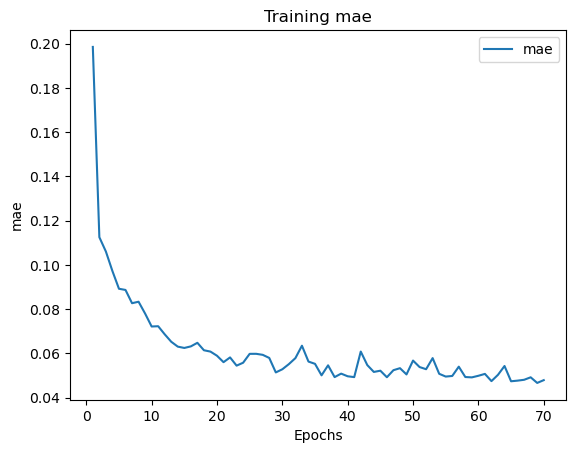

In [69]:
history_dict = history.history
mae = history_dict['mae']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['mae'] 
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, label='mae') 

plt.title('Training mae') 
plt.xlabel('Epochs')
plt.ylabel('mae') 
plt.legend()
plt.show()

5/5 [==============================] - 0s 7ms/step


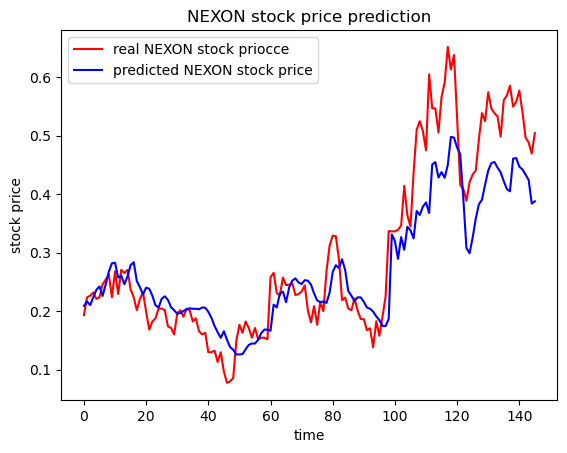

 20221230 주가 : [15172.67296882] KRW


In [70]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real NEXON stock priocce')
plt.plot(pred_y, color='blue', label='predicted NEXON stock price')
plt.title('NEXON stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print(" 20221230 주가 :", data['종가'][-1:].values * pred_y[-1] / dfy['종가'][-1:].values, 'KRW')
#df.Close[-1] : dfy.Close[-1] = y : pred_y[-1]

In [135]:
data2023 = df[(df['종목명'] == '넥슨게임즈') & (df.index.astype(str).str.startswith('2023'))]

In [137]:
data2023

,종목코드,종목명,거래량,시가,고가,저가,종가
일자,,,,,,,
20230102,A225570,넥슨게임즈,727445,13100,13150,12300,12350
20230103,A225570,넥슨게임즈,712924,12300,12450,11750,12000
20230104,A225570,넥슨게임즈,486294,11750,12250,11750,12050
20230105,A225570,넥슨게임즈,639359,12100,12600,12100,12150
20230106,A225570,넥슨게임즈,743802,12100,13300,12100,13300
...,...,...,...,...,...,...,...
20230523,A225570,넥슨게임즈,891621,20750,21050,19960,20400
20230524,A225570,넥슨게임즈,738235,20250,20300,19550,19600
20230525,A225570,넥슨게임즈,550344,19410,19820,19070,19440


In [142]:
dfx = data2023[['시가','고가','저가','거래량', '종가']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]
dfx = dfx[['시가','고가','저가','거래량']]
dfx

,시가,고가,저가,거래량
일자,,,,
20230102,0.130435,0.083721,0.056995,0.052369
20230103,0.053140,0.018605,0.000000,0.050889
20230104,0.000000,0.000000,0.000000,0.027800
20230105,0.033816,0.032558,0.036269,0.043394
20230106,0.033816,0.097674,0.036269,0.054035
...,...,...,...,...
20230523,0.869565,0.818605,0.850777,0.069095
20230524,0.821256,0.748837,0.808290,0.053468
20230525,0.740097,0.704186,0.758549,0.034326


In [143]:
X = np.array(dfx)
y = np.array(dfy)

window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.76231884 0.82790698 0.81761658 0.14861707]
 [0.87439614 0.82325581 0.86528497 0.07734692]
 [0.90821256 0.91162791 0.93264249 0.11988885]
 [0.9178744  0.84651163 0.89637306 0.03940216]
 [0.88405797 0.82325581 0.87564767 0.04360413]
 [0.85507246 0.86046512 0.9119171  0.059962  ]
 [0.86956522 0.81860465 0.8507772  0.0690951 ]
 [0.82125604 0.74883721 0.80829016 0.05346802]
 [0.74009662 0.70418605 0.75854922 0.03432555]
 [0.74009662 0.69953488 0.76165803 0.02423549]] -> [0.74326923]


In [146]:
test_X = np.asarray(data_X)
test_y = np.asarray(data_y)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

테스트 데이터의 크기 : (91, 10, 4) (91, 1)


In [147]:
pred_y = model.predict(test_X)

3/3 [==============================] - 0s 5ms/step


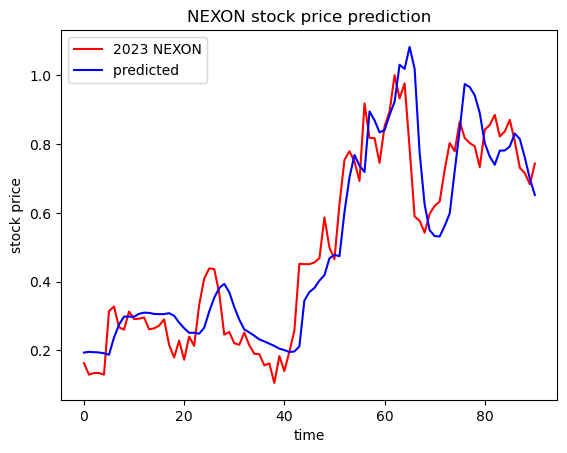

In [149]:
plt.figure()
plt.plot(test_y, color='red', label='2023 NEXON')
plt.plot(pred_y, color='blue', label='predicted ')
plt.title('NEXON stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

C:\Users\procns\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\procns\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\procns\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\procns\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


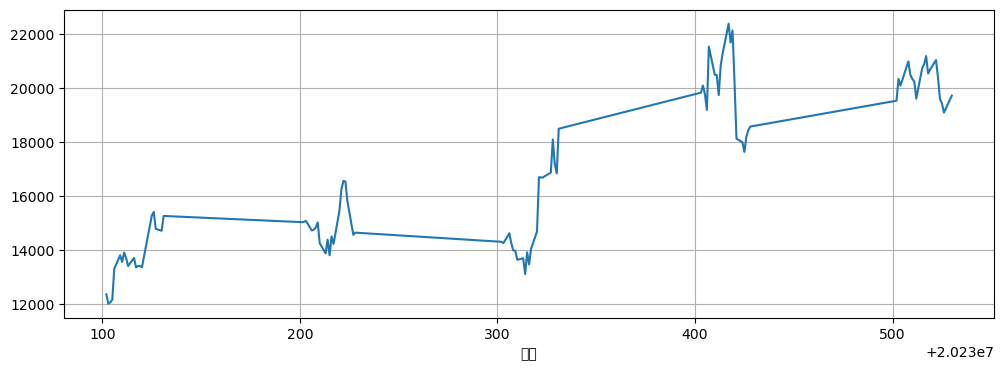

In [177]:
data2023['종가'].plot(figsize=(12,4), grid=True);

,종목코드,종목명,거래량,시가,고가,저가,종가
일자,,,,,,,
20230102,A225570,넥슨게임즈,727445,13100,13150,12300,12350
20230103,A225570,넥슨게임즈,712924,12300,12450,11750,12000
20230104,A225570,넥슨게임즈,486294,11750,12250,11750,12050
20230105,A225570,넥슨게임즈,639359,12100,12600,12100,12150
20230106,A225570,넥슨게임즈,743802,12100,13300,12100,13300
...,...,...,...,...,...,...,...
20230523,A225570,넥슨게임즈,891621,20750,21050,19960,20400
20230524,A225570,넥슨게임즈,738235,20250,20300,19550,19600
20230525,A225570,넥슨게임즈,550344,19410,19820,19070,19440
